In [1]:
%matplotlib inline  


In [2]:
import sys
print(sys.version)

3.6.4 (default, Jan 28 2018, 17:52:01) 
[GCC 5.4.0 20160609]


In [21]:
import numpy as np
import json

In [4]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

In [5]:
from lifelines.statistics import logrank_test


In [19]:
data = {
  'all_of_defaults': {
    'attrition': [],
    'lifetimes': [],
  },
  'half_of_defaults': {
    'attrition': [],
    'lifetimes': [],
  },
  'one': {
    'attrition': [],
    'lifetimes': [],
  }
}

In [22]:
data = json.loads('{"all_of_defaults":{"lifetimes":[89,62,62,62,56,54,51,49,49,43,43,41,40,40,35,37,37,34,28,18,23,20,20,11,18,15,14,14,1,0,12,12,11,11,11,11,3,10,9,0,4,9,8,1,8,7,0,6,0,0,1,4,4,4,1,3,2,2,2,2,1],"attritions":[0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1]},"half_of_defaults":{"lifetimes":[110,76,59,61,52,45,44,39,40,36,36,38,33,28,25,26,24,23,22,20,19,7,17,17,17,6,16,13,14,12,12,7,12,12,10,11,11,11,11,5,10,8,11,10,1,10,10,10,2,9,9,0,9,6,8,8,8,5,0,3,6,3,4,4,3,0,2,0,2,2,0,1,0,0],"attritions":[0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0]},"one":{"lifetimes":[195,127,61,57,57,54,53,48,34,40,36,36,35,33,31,33,27,22,24,24,24,20,21,18,10,15,15,12,9,12,12,12,12,12,10,0,12,12,6,12,12,10,11,11,8,1,11,10,10,10,10,6,9,9,8,6,5,6,6,6,6,5,4,4,3,1,3,2,2,2,2,0,1,1,0],"attritions":[0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0]}}')

In [26]:
print(data)

{'all_of_defaults': {'lifetimes': [89, 62, 62, 62, 56, 54, 51, 49, 49, 43, 43, 41, 40, 40, 35, 37, 37, 34, 28, 18, 23, 20, 20, 11, 18, 15, 14, 14, 1, 0, 12, 12, 11, 11, 11, 11, 3, 10, 9, 0, 4, 9, 8, 1, 8, 7, 0, 6, 0, 0, 1, 4, 4, 4, 1, 3, 2, 2, 2, 2, 1], 'attritions': [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]}, 'half_of_defaults': {'lifetimes': [110, 76, 59, 61, 52, 45, 44, 39, 40, 36, 36, 38, 33, 28, 25, 26, 24, 23, 22, 20, 19, 7, 17, 17, 17, 6, 16, 13, 14, 12, 12, 7, 12, 12, 10, 11, 11, 11, 11, 5, 10, 8, 11, 10, 1, 10, 10, 10, 2, 9, 9, 0, 9, 6, 8, 8, 8, 5, 0, 3, 6, 3, 4, 4, 3, 0, 2, 0, 2, 2, 0, 1, 0, 0], 'attritions': [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]}, 'one':

In [6]:
#other_lifetimes = np.random.exponential(3, size=500)
#observed_lifetimes = np.random.exponential(3.5, size=500)
#other_lifetimes_observations = [1]*len(other_lifetimes)
#observed_lifetimes_observations = [1]*len(observed_lifetimes)

In [27]:
results = logrank_test(data['all_of_defaults']['lifetimes'], data['one']['lifetimes'], event_observed_A=data['all_of_defaults']['attritions'], event_observed_B=data['one']['attritions'])
print(results)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p   
        0.0056 0.9404
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [7]:
results = logrank_test(observed_lifetimes, other_lifetimes, event_observed_A=observed_lifetimes_observations, event_observed_B=other_lifetimes_observations, alpha=0.95)
print(results)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p     
       12.2730 0.0005  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [8]:
from lifelines.estimation import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [9]:
T = df['T']
E = df['E']

In [10]:
print([x for x in E])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
print([x for x in T])

[6.0, 13.0, 13.0, 13.0, 19.0, 19.0, 19.0, 26.0, 26.0, 26.0, 26.0, 26.0, 33.0, 33.0, 47.0, 62.0, 62.0, 9.0, 9.0, 9.0, 15.0, 15.0, 22.0, 22.0, 22.0, 22.0, 29.0, 29.0, 29.0, 29.0, 29.0, 36.0, 36.0, 43.0, 33.0, 54.0, 54.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 32.0, 53.0, 53.0, 60.0, 60.0, 60.0, 60.0, 60.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 75.0, 17.0, 51.0, 51.0, 51.0, 58.0, 58.0, 58.0, 58.0, 66.0, 66.0, 7.0, 7.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 69.0, 69.0, 38.0, 38.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 53.0, 53.0, 53.0, 53.0, 53.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 66.0]


In [12]:
kmf.fit([x for x in T], event_observed=[x for x in E])

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

In [13]:
kmf.median_

56.0

In [14]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690
15.0,0.938344
17.0,0.932170
19.0,0.913650
22.0,0.888957


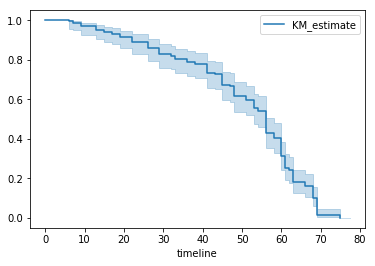

In [15]:
kmf.plot()